### Fingerprint

A técnica de Fingerprint envolve a criação de um banco de dados contendo amostras de informações, como potência do sinal, time advance e outros parâmetros que caracterizam uma determinada região. O conceito subjacente a esse algoritmo é utilizar esse banco de dados como um espaço de referência, no qual é possível comparar os sinais coletados em uma localização desconhecida com as informações armazenadas na base de dados. Isso permite estimar qual ponto da base de dados é mais similar à posição atual do objeto de interesse.

###  Solução:

O algoritmo de busca Fingerprint utiliza o cálculo da distância euclidiana, considerando as perdas em espaço livre das estações rádio base como características (features) e é inspirado no conceito de Fingerprint. Este algoritmo, baseado em machine learning, utiliza uma abordagem de regressão linear. Ele emprega as perdas em espaço livre das estações rádio base como entradas e tem como saída a estimativa da latitude e longitude do objeto de interesse.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df_train_alunos = pd.read_csv("../../processed_files/meds_train_alunos.csv")
df_bts = pd.read_csv('../../processed_files/bts.csv')


In [23]:
df_train_alunos.head()

,Unnamed: 0,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts,flag_indoor
0,0,6604,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.00,5.0,3.0,2.0,-8.055786,-34.951505,True
1,1,5515,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True
2,2,5049,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.00,5.0,3.0,2.0,-8.055506,-34.951693,True
3,3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.27,4.0,7.0,2.0,-8.050390,-34.959630,False
4,4,1203,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.00,5.0,3.0,2.0,-8.055380,-34.951736,True


In [30]:
df_bts

,Unnamed: 0,id_localizacao_setor,id_bts,nom_bts,num_lat_bts,num_long_bts,nom_canal_controle_bts,num_azimuth,id_rrsi
0,0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952000,873,0,rssi_1_1
1,1,1,BTS_1_2,PEMDL01_2,-8.04342,-34.952000,872,120,rssi_1_2
2,2,1,BTS_1_3,PEMDL01_3,-8.04342,-34.952000,875,240,rssi_1_3
3,3,2,BTS_2_1,PEMDL08_1,-8.05289,-34.944672,865,0,rssi_2_1
4,4,2,BTS_2_2,PEMDL08_2,-8.05289,-34.944672,874,120,rssi_2_2
5,5,2,BTS_2_3,PEMDL08_3,-8.05289,-34.944672,871,240,rssi_2_3
6,6,3,BTS_3_1,PEMDL09_1,-8.05532,-34.957900,877,0,rssi_3_1
7,7,3,BTS_3_2,PEMDL09_2,-8.05532,-34.957900,881,120,rssi_3_2
8,8,3,BTS_3_3,PEMDL09_3,-8.05532,-34.957900,869,240,rssi_3_3


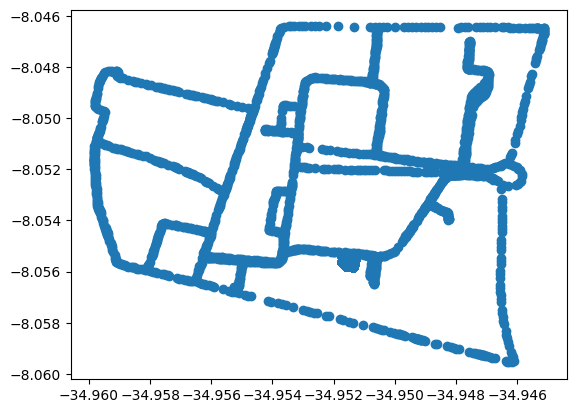

In [24]:
plt.scatter(df_train_alunos.num_long_bts, df_train_alunos.num_lat_bts)


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
# Carregando os dados
df = pd.read_csv("../../processed_files/meds_train_alunos.csv")


In [41]:
df.head()

,Unnamed: 0,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts,flag_indoor
0,0,6604,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.00,5.0,3.0,2.0,-8.055786,-34.951505,True
1,1,5515,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True
2,2,5049,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.00,5.0,3.0,2.0,-8.055506,-34.951693,True
3,3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.27,4.0,7.0,2.0,-8.050390,-34.959630,False
4,4,1203,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.00,5.0,3.0,2.0,-8.055380,-34.951736,True


In [43]:
# Preparação dos dados
X = df[['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']]
y = df[['num_lat_bts', 'num_long_bts']]

In [44]:
# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Treinamento do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [46]:
# Previsões
y_pred = model.predict(X_test)

In [47]:
# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [48]:

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 2.1454417872475444e-06
Mean Absolute Error (MAE): 0.0010437854504671312


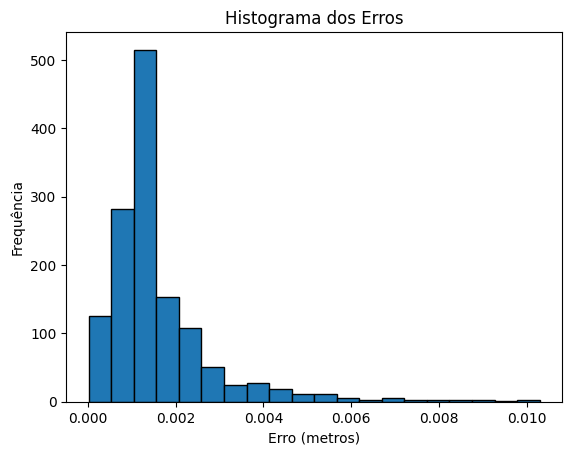

In [49]:
# Histograma e Box-Plot dos Erros
errors = np.sqrt(np.sum((y_pred - y_test) ** 2, axis=1))
plt.hist(errors, bins=20, edgecolor='k')
plt.xlabel('Erro (metros)')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros')
plt.show()

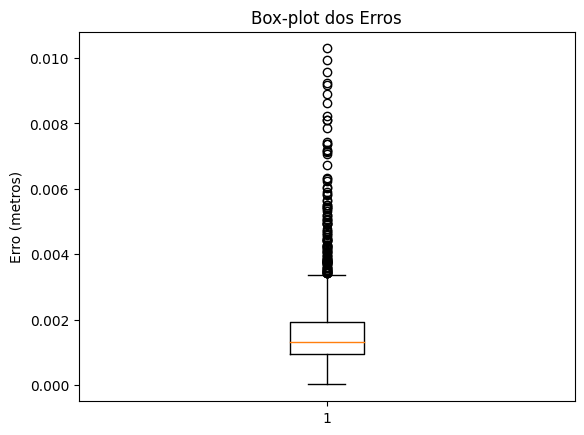

In [50]:
plt.boxplot(errors)
plt.ylabel('Erro (metros)')
plt.title('Box-plot dos Erros')
plt.show()

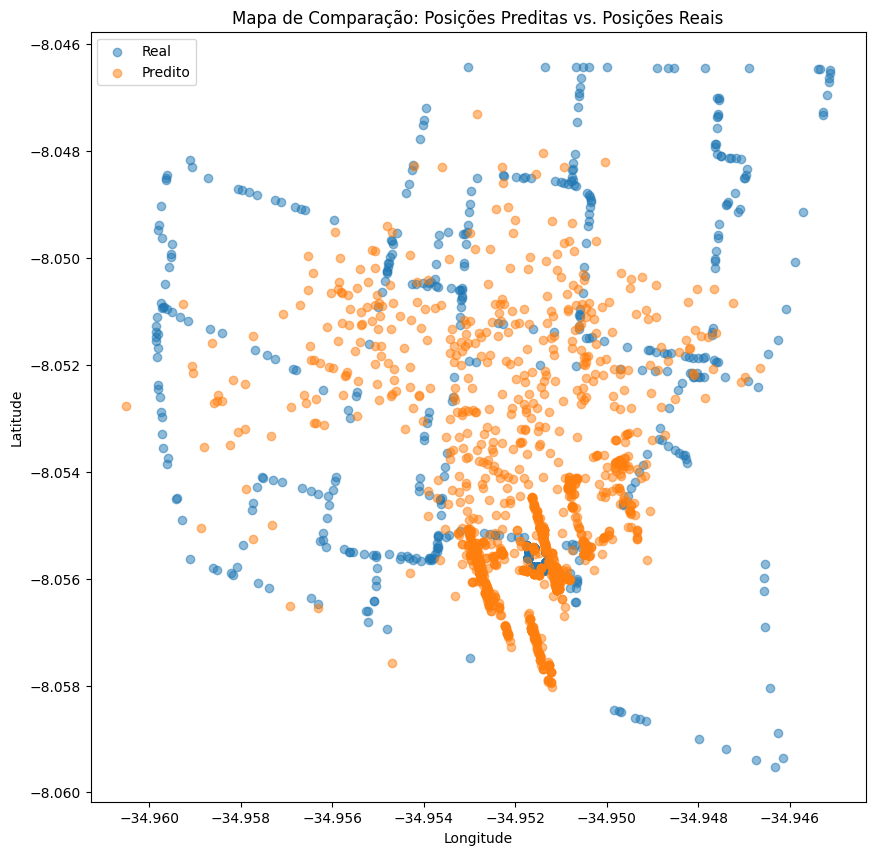

In [52]:
# Mapa de comparação: posições preditas vs. posições reais
plt.figure(figsize=(10, 10))
plt.scatter(y_test['num_long_bts'], y_test['num_lat_bts'], label='Real', alpha=0.5)
plt.scatter(y_pred[:, 1], y_pred[:, 0], label='Predito', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapa de Comparação: Posições Preditas vs. Posições Reais')
plt.legend()
plt.show()


In [54]:
df.head()

,Unnamed: 0,id_ponto,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,num_lat_bts,num_long_bts,flag_indoor
0,0,6604,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.00,5.0,3.0,2.0,-8.055786,-34.951505,True
1,1,5515,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True
2,2,5049,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.00,5.0,3.0,2.0,-8.055506,-34.951693,True
3,3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.27,4.0,7.0,2.0,-8.050390,-34.959630,False
4,4,1203,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.00,5.0,3.0,2.0,-8.055380,-34.951736,True


array([-8.05688109, -8.05511033, -8.05199484, ..., -8.05554109,
       -8.05178648, -8.05555985])

In [ ]:
# resultados = pd.DataFrame({'ponto_id': df['ponto_id'], 'lat_pred': y_pred[:, 0], 'lon_pred': y_pred[:, 1]})
# resultados.to_csv('Resultados_EquipeX_MetodoY.csv', index=False)